In [14]:
import matplotlib.pyplot as plt 
import numpy as np
from datasets import load_dataset
import evaluate
import tqdm

In [2]:
run_names1 = ["math_fft_full", "math_fft_rand_traincorrect1+", "math_fft_rand_traincorrect2+", "math_fft_rand_traincorrect3+", "math_fft_rand_traincorrect5+", ]
run_names2 = ["math_fft_full", "math_fft_subsample_traincorrect1+", "math_fft_subsample_traincorrect2+", "math_fft_subsample_traincorrect3+", "math_fft_subsample_traincorrect5+", ]

In [3]:
test_pass_5s_1 = []
for run_name in run_names1:
    test_answer_types = np.load(f"../ckpts/{run_name}/test_answer_types5.npy")
    test_answer_correct = test_answer_types==0
    test_pass_5 = test_answer_correct.max(axis=1)
    print(run_name, np.mean(test_pass_5))
    test_pass_5s_1.append(test_pass_5)
    
test_pass_5s_1 = np.array(test_pass_5s_1)

test_pass_5s_1_gsm8k = []
for run_name in run_names1:
    test_answer_types = np.load(f"../ckpts/{run_name}/gsm8k_test_answer_types5.npy")
    test_answer_correct = test_answer_types==0
    test_pass_5 = test_answer_correct.max(axis=1)
    print(run_name, np.mean(test_pass_5))
    test_pass_5s_1_gsm8k.append(test_pass_5)
    
test_pass_5s_1_gsm8k = np.array(test_pass_5s_1_gsm8k)

math_fft_full 0.1644
math_fft_rand_traincorrect1+ 0.1432
math_fft_rand_traincorrect2+ 0.1362
math_fft_rand_traincorrect3+ 0.1364
math_fft_rand_traincorrect5+ 0.1246
math_fft_full 0.21076573161485973
math_fft_rand_traincorrect1+ 0.18423047763457165
math_fft_rand_traincorrect2+ 0.16755117513267628
math_fft_rand_traincorrect3+ 0.18498862774829417
math_fft_rand_traincorrect5+ 0.17513267626990145


In [4]:
test_pass_5s_2 = []
for run_name in run_names2:
    test_answer_types = np.load(f"../ckpts/{run_name}/test_answer_types5.npy")
    test_answer_correct = test_answer_types==0
    test_pass_5 = test_answer_correct.max(axis=1)
    print(run_name, np.mean(test_pass_5))
    test_pass_5s_2.append(test_pass_5)
    
test_pass_5s_2 = np.array(test_pass_5s_2)


test_pass_5s_2_gsm8k = []
for run_name in run_names2:
    test_answer_types = np.load(f"../ckpts/{run_name}/gsm8k_test_answer_types5.npy")
    test_answer_correct = test_answer_types==0
    test_pass_5 = test_answer_correct.max(axis=1)
    print(run_name, np.mean(test_pass_5))
    test_pass_5s_2_gsm8k.append(test_pass_5)
    
test_pass_5s_2_gsm8k = np.array(test_pass_5s_2_gsm8k)

math_fft_full 0.1644
math_fft_subsample_traincorrect1+ 0.1582
math_fft_subsample_traincorrect2+ 0.157
math_fft_subsample_traincorrect3+ 0.1584
math_fft_subsample_traincorrect5+ 0.1496
math_fft_full 0.21076573161485973
math_fft_subsample_traincorrect1+ 0.21304018195602728
math_fft_subsample_traincorrect2+ 0.19939347990902198
math_fft_subsample_traincorrect3+ 0.19408642911296436
math_fft_subsample_traincorrect5+ 0.19029567854435178


In [7]:
train_answer_types = np.load("../ckpts/math_fft_full/train_answer_types.npy")
num_points_all = []

for num_correct in [0, 1, 2, 3, 5]:
    num_points = ((train_answer_types==0).sum(axis=-1)>=num_correct).sum()
    num_points_all.append(num_points)

num_points_all = np.array(num_points_all)

Text(0.5, 1.0, 'MATH')

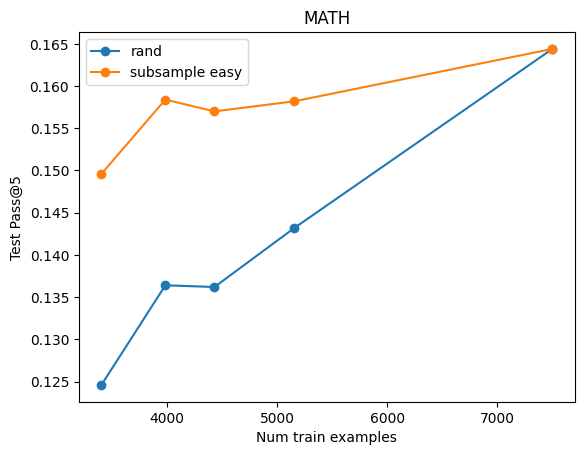

In [8]:
plt.plot(num_points_all, np.mean(test_pass_5s_1, axis=1), "o-", label="rand")
plt.plot(num_points_all, np.mean(test_pass_5s_2, axis=1), "o-", label="subsample easy")

plt.ylabel("Test Pass@5")
plt.xlabel("Num train examples")
plt.legend()
plt.title("MATH")

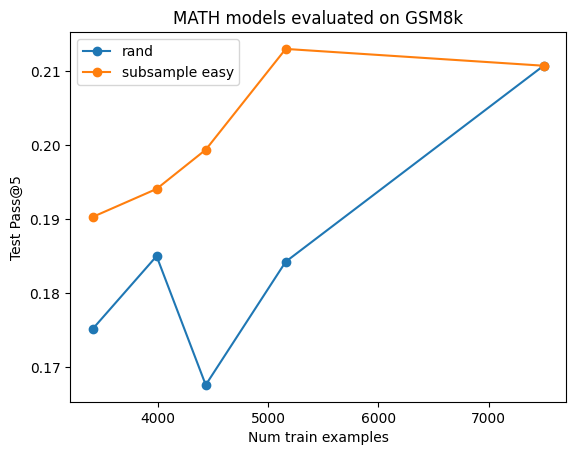

In [9]:
plt.plot(num_points_all, np.mean(test_pass_5s_1_gsm8k, axis=1), "o-", label="rand")
plt.plot(num_points_all, np.mean(test_pass_5s_2_gsm8k, axis=1), "o-", label="subsample easy")

plt.ylabel("Test Pass@5")
plt.xlabel("Num train examples")
plt.title("MATH models evaluated on GSM8k")
plt.legend()

In [10]:
dataset = load_dataset("hendrycks/competition_math")
test_levels = np.array([int(level[-1]) for level in dataset["test"]['level']])

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


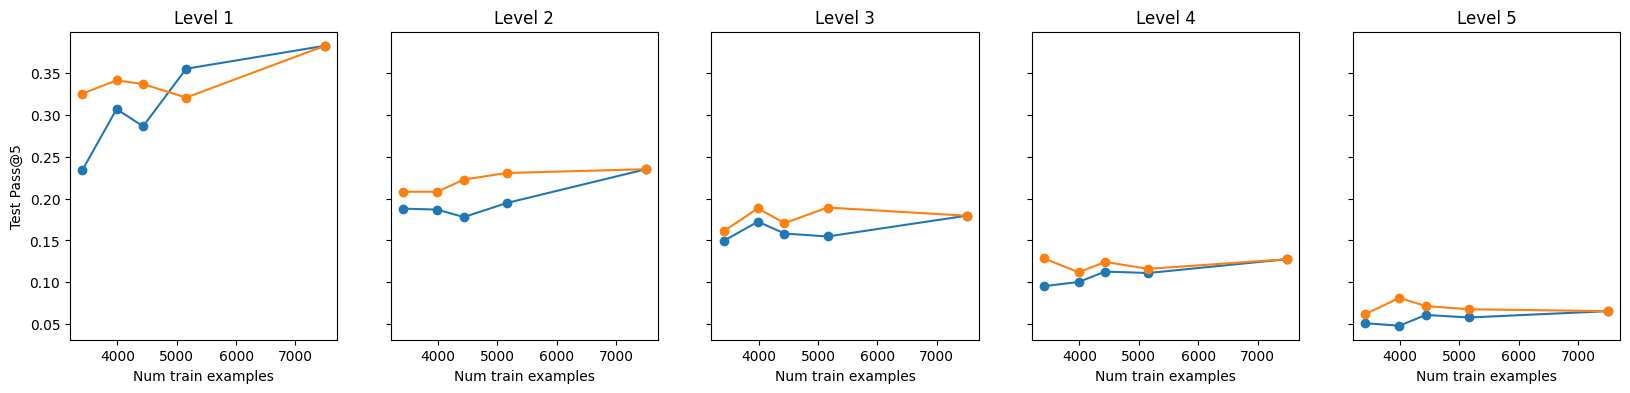

In [11]:
# make 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i in range(5):
    level_idxs = np.where(test_levels == i+1)[0]

    axs[i].plot(num_points_all, np.mean(test_pass_5s_1[:, level_idxs], axis=1), "o-", label="rand")
    axs[i].plot(num_points_all, np.mean(test_pass_5s_2[:, level_idxs], axis=1), "o-", label="subsample")
    
    axs[i].set_title(f"Level {i+1}")
    axs[i].set_xlabel("Num train examples")
    if i == 0:
        axs[i].set_ylabel("Test Pass@5")

In [12]:
train_levels = []

for level in dataset["train"]['level']:
    if level[-1] == "?":
        train_levels.append(0)
    else:
        train_levels.append(int(level[-1]))

train_levels = np.array(train_levels)

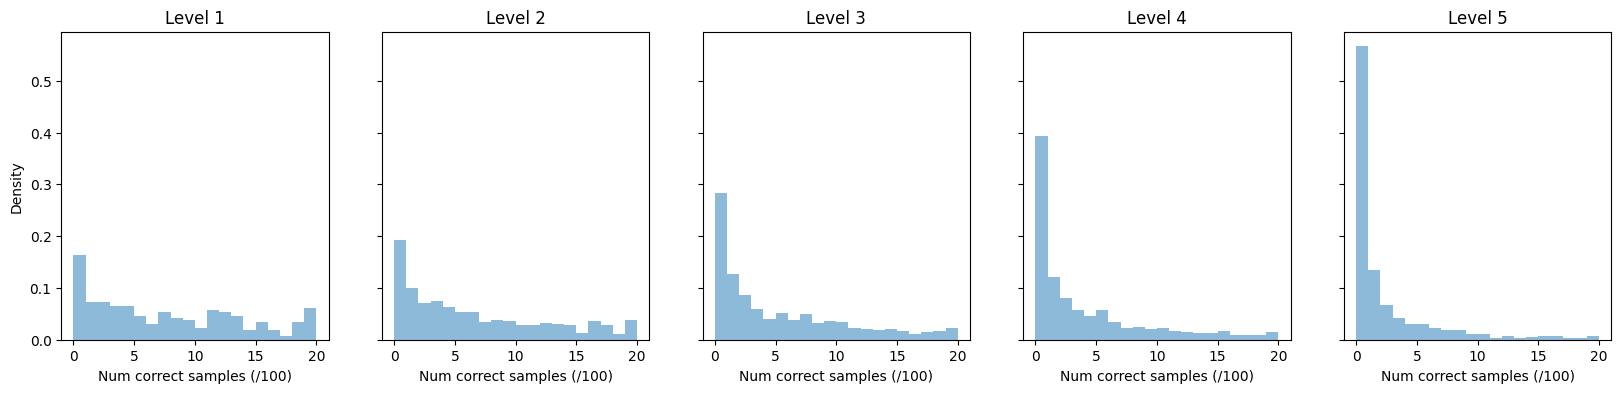

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i in range(5):
    level_idxs = np.where(train_levels == i+1)[0]
    axs[i].hist((train_answer_types==0).sum(axis=-1)[level_idxs], bins=range(0, 21, 1), alpha=0.5, label=f"Level {i+1}", density=True)
    axs[i].set_title(f"Level {i+1}")
    axs[i].set_xlabel("Num correct samples (/100)")
    if i == 0:
        axs[i].set_ylabel("Density")

In [20]:
train_answer_types = np.load("../ckpts/math_fft_full/train_answer_types.npy")
# train_answers = np.load("../ckpts/math_fft_full/train_answers.npy")


In [24]:
# dataset = load_dataset("hendrycks/competition_math")
train_questions = dataset["train"]['problem']
train_answers = dataset["train"]['solution']

train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [40]:
len(train_answer_types)

7500

In [47]:
hard_idxs = np.where((train_answer_types==0).sum(axis=-1)<1)[0]
level1_idxs = np.where(train_levels == 1)[0]

hard_level1_idxs = np.intersect1d(hard_idxs, level1_idxs)

In [48]:
train_answers[hard_level1_idxs]

array(['Let $d$ equal the cost of a 70 mile taxi ride. Since we know that Ann was charged $120 dollars a 50 mile taxi ride, we can set up the proportion $\\frac{120}{50}=\\frac{d}{70}$. If we solve for $d$ by multiplying both sides by 70, we find that $d=\\left(\\frac{120}{50}\\right)(70)=\\boxed{168}$ dollars.',
       '$f(g(2))=f(2^2-6)=f(-2)=-2+3=\\boxed{1}$.',
       'Simplifying, we have: \\begin{align*}\n(1)(2a)(3a^2)(4a^3)(5a^4) &= (1)(2)(3)(4)(5)(a)(a^2)(a^3)(a^4) \\\\\n&= 120a^{1+2+3+4} = \\boxed{120a^{10}}.\n\\end{align*}',
       'We have $\\frac{3}{x} = \\frac{1}{2} - \\frac{1}{3} = \\frac{3}{6} - \\frac26 =\\frac16$.  Cross-multiplying $\\frac3x =\\frac16$ gives $x = \\boxed{18}$.',
       'We note that $361=19^2$ and $36=6^2$, so $x=19^2+2(19)(6)+6^2$. This is just the binomial expansion of $(19+6)^2=25^2=\\boxed{625}$.',
       'Starting with $2^6\\cdot3^3\\cdot11^3$, the cube root of that expression is $2^{6/3}\\cdot3^{3/3}\\cdot11^{3/3}$, which is $2^2\\cdot3\\cdot11=\

In [49]:
train_questions[hard_level1_idxs]

array(['After traveling 50 miles by taxi, Ann is charged a fare of $\\$120$. Assuming the taxi fare is directly proportional to distance traveled, how much would Ann be charged (in dollars) if she had traveled 70 miles?',
       '$f (x) = x + 3$ and $g(x) = x^2 -6$, what is the value of $f (g(2))$?',
       'Simplify $(1)(2a)(3a^2)(4a^3)(5a^4)$.',
       'If $x$ satisfies $\\frac{1}{2}-\\frac{1}{3}=\\frac{3}{x}$, then what is the value of $x$ ?',
       '$361+2(19)(6)+36=x$. Solve for $x$.',
       'Rewrite $\\sqrt[3]{2^6\\cdot3^3\\cdot11^3}$ as an integer.',
       'Rural School USA has 105 students enrolled. There are 60 boys and 45 girls. If $\\frac{1}{10}$ of the boys and $\\frac{1}{3}$ of the girls are absent on one day, what percent of the total student population is absent?',
       'The fifth, sixth and seventh terms of an arithmetic sequence are 5, 9 and 13, respectively. What is the sum of the first four terms of the sequence? [asy]\nunitsize(8mm);\ndefaultpen(linewidth(.7pt)